In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tqdm.notebook import tqdm

sns.set(style='whitegrid', font_scale=1.3)

In [17]:
def benchmark(heaps, N_list, Q):
    bench_result = dict()
    bench_result['N_list'] = N_list
    bench_result['Q'] = Q
    bench_result['latency'] = []
    bench_result['datetime'] = datetime.now().strftime("%Y-%d-%m_%H-%M-%S")
    bench_result['checksums'] = None
    
    for heap, options in heaps:
        for option_name, option in options:
            errors = !./compile {heap} {option}
            assert len(errors) == 0, option_name
            
            values = []
            checksums = []
            for N in tqdm(N_list, desc=option_name):
                res = !./run {heap} {N} {Q}
                checksums += [float(res[0].split(': ')[1])]
                values += [float(res[1].split(': ')[1])]
            
            if bench_result['checksums'] is None:
                bench_result['checksums'] = checksums
            else:
                assert bench_result['checksums'] == checksums, option_name
            
            bench_result['latency'] += [(option_name, values)]
    
    return bench_result

def plot_latency(bench_result):   
    plt.figure(figsize=(10, 8))
    
    N_list = bench_result['N_list']
    for label, values in bench_result['latency']:
        plt.plot(N_list, values, label=label, lw=2)

    for cs, cl in [(32*1024, '32KB'), (512*1024, '512KB'), (16*1024*1024, '16MB')]:
        plt.axvline(cs / 4, color='black', ls='--')
        plt.text(cs / 4 * 1.1 , 10, cl)

    plt.xlabel('Количество элементов')
    plt.ylabel('query latency (ns)')
    plt.xlim((N_list[0], N_list[-1]))
    plt.ylim((0, None))
    plt.legend(loc='upper left')
    plt.xscale('log')
    svg_file = 'figures/latency_{}.svg'.format(bench_result['datetime'])
    plt.savefig(svg_file)
    plt.show()

stl:   0%|          | 0/10 [00:00<?, ?it/s]

cmov no prefetch:   0%|          | 0/10 [00:00<?, ?it/s]

branch no prefetch:   0%|          | 0/10 [00:00<?, ?it/s]

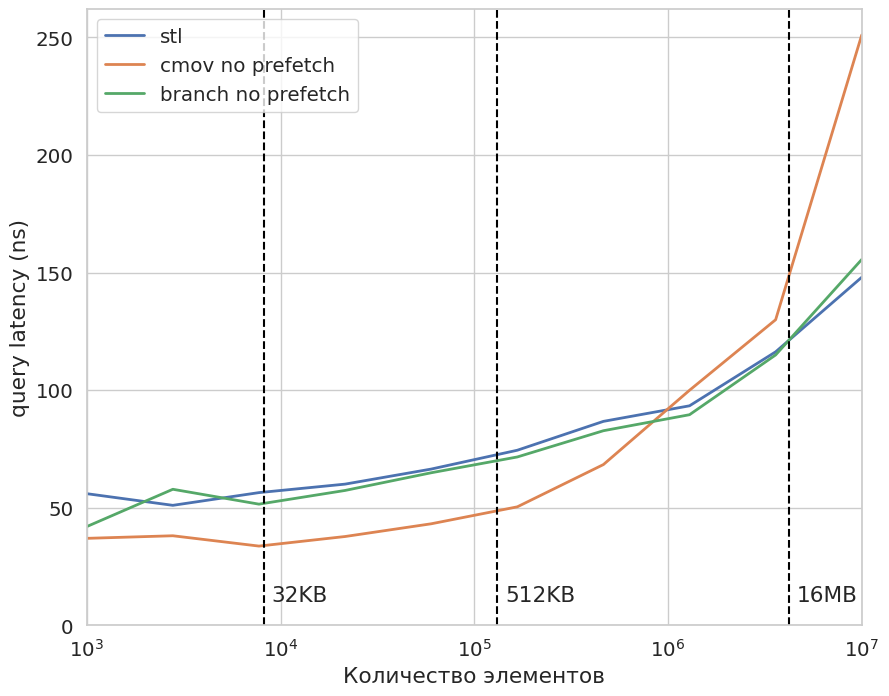

In [19]:
heaps = [
    ('stl_heap', [('stl', '')]),
    ('cmov_heap', [('cmov no prefetch', '-D PREFETCH_LEVEL=0')]),
    ('branch_heap', [
        ('branch no prefetch', '-D PREFETCH_LEVEL=0')
    ]),
]
N_list = np.logspace(3, 7, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

branch:   0%|          | 0/10 [00:00<?, ?it/s]

cmov:   0%|          | 0/10 [00:00<?, ?it/s]

simd128:   0%|          | 0/10 [00:00<?, ?it/s]

simd128x2:   0%|          | 0/10 [00:00<?, ?it/s]

simd256:   0%|          | 0/10 [00:00<?, ?it/s]

simd256x2:   0%|          | 0/10 [00:00<?, ?it/s]

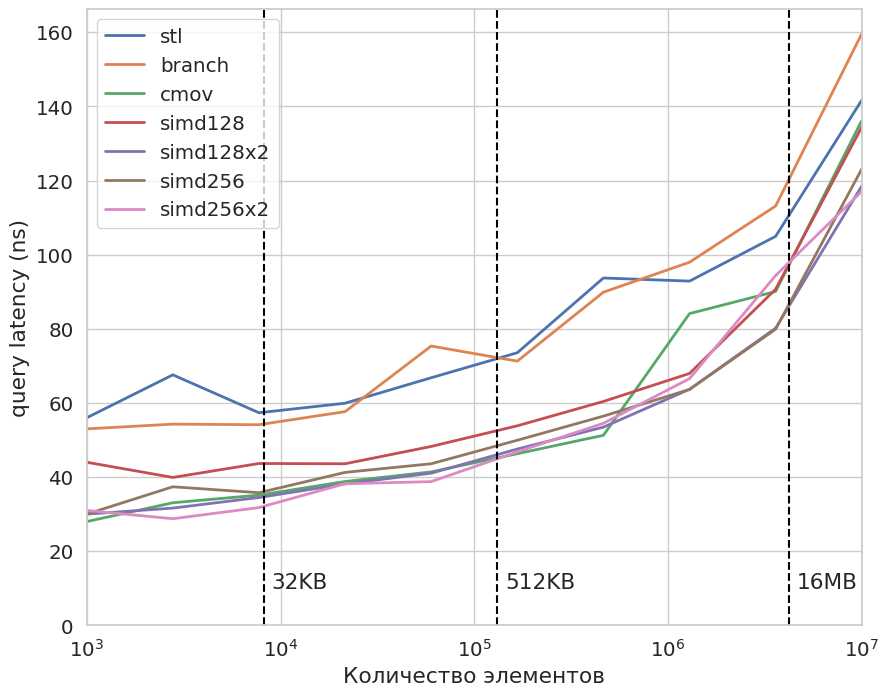

In [20]:
heaps = [
    ('stl_heap', [('stl', '')]),
    ('branch_heap', [('branch', '')]),
    ('cmov_heap', [('cmov', '')]),
    ('simd128_heap', [('simd128', '')]),
    ('simd128x2_heap', [('simd128x2', '')]),
    ('simd256_heap', [('simd256', '')]),
    ('simd256x2_heap', [('simd256x2', '')]),
]
N_list = np.logspace(3, 7, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

simd256x2:   0%|          | 0/10 [00:00<?, ?it/s]

simd256x2 ctz:   0%|          | 0/10 [00:00<?, ?it/s]

simd256x4 ctz:   0%|          | 0/10 [00:00<?, ?it/s]

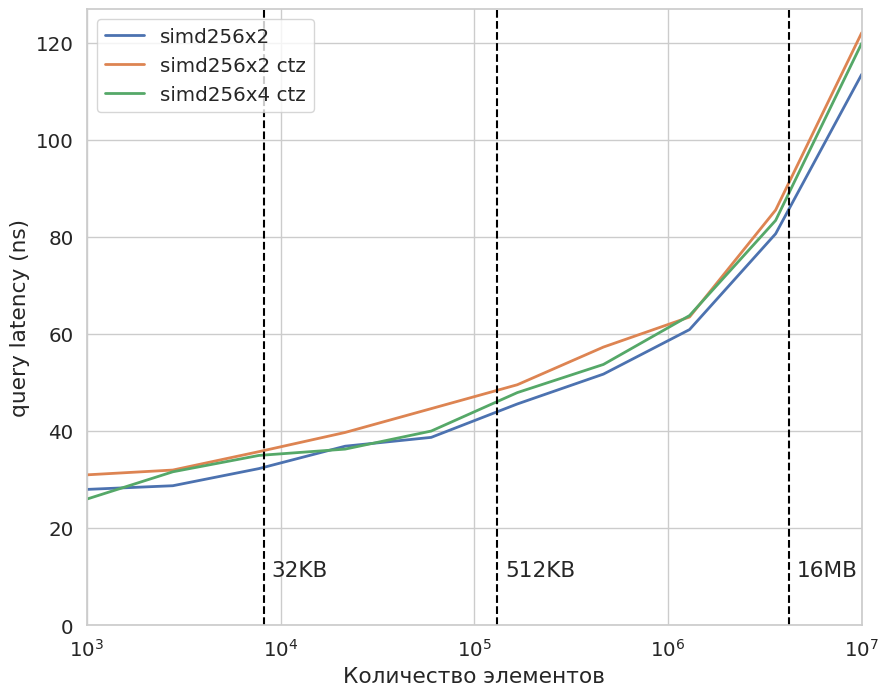

In [23]:
heaps = [
    ('simd256x2_heap', [('simd256x2', '')]),
    ('simd256x2ctz_heap', [('simd256x2 ctz', '')]),
    ('simd256x4ctz_heap', [('simd256x4 ctz', '')]),
]
N_list = np.logspace(3, 7, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)